In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install scikit-plot
import sklearn
from sklearn.metrics import accuracy_score, average_precision_score, matthews_corrcoef


In [2]:
df=pd.read_csv('predictive_maintenance.csv')

In [3]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["Failure Type"])

In [5]:
encoded_results_1

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [6]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)

In [7]:
encoded_results_2 = labelbinarizer.fit_transform(df["Type"])

In [8]:
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

In [9]:
df1 = pd.concat([df,df_encoded_1, df_encoded_2], axis=1)

In [10]:
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


In [11]:
df1.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

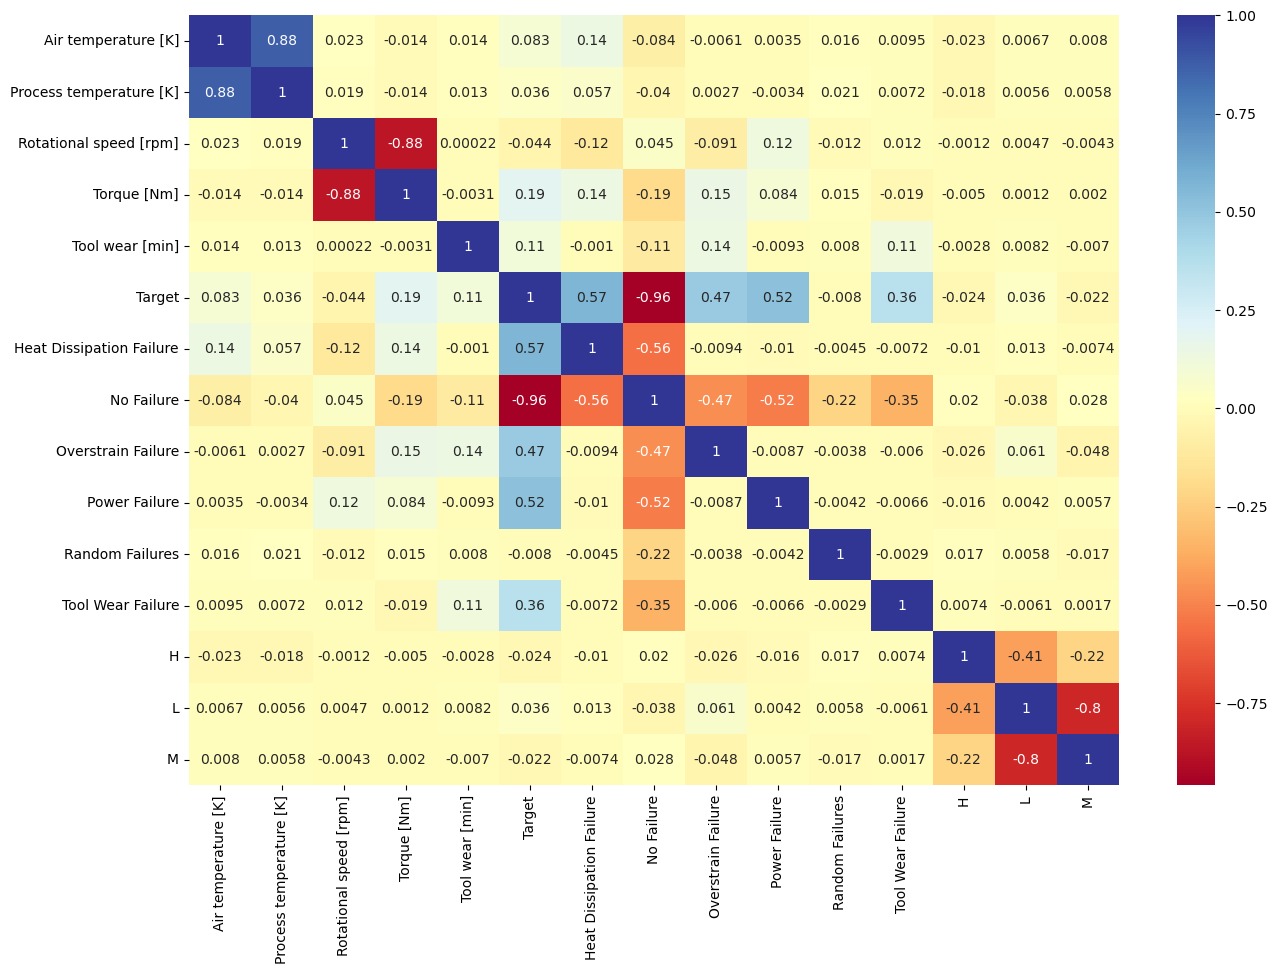

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

In [13]:
df1.isnull().values.any()

False

In [14]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [15]:
DF = df1[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]

In [16]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [17]:
DF.columns=DF.columns.astype("str")

In [18]:
col_name=DF.columns.to_list()

In [19]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'H',
 'L',
 'M',
 'Target',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [20]:
DF = DF.reset_index(drop=True)

In [21]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [22]:
X = DF.values[:, 0:8].astype("float")
y = DF.values[:,8:].astype("uint8")
print(X.shape)
print(y.shape)

(10000, 8)
(10000, 7)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [24]:
y_train.shape

(6700, 7)

In [25]:
y_test.shape

(3300, 7)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_test)

In [27]:

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [28]:
from sklearn.multioutput import ClassifierChain

In [29]:
from sklearn.multioutput import MultiOutputClassifier
model_lgb = MultiOutputClassifier(estimator=lgbm,n_jobs=None)

In [30]:
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

In [31]:
model_lgb_pred = chain_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 13, number of negative: 6687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001940 -> initscore=-6.242971
[LightGBM] [Info] Start training from score -6.242971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [32]:
print(model_lgb_pred.score(X_test,y_test))

0.9839393939393939


In [33]:
yhat_lgb = model_lgb_pred.predict(X_test)

In [34]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_lgb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_lgb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_lgb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_lgb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_lgb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_lgb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_lgb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_lgb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_lgb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_lgb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_lgb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_lgb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_lgb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_lgb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_lgb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_lgb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_lgb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_lgb[:,5])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,6],yhat_lgb[:,6])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,6],yhat_lgb[:,6])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,6],yhat_lgb[:,6])))

Accuracy Score: 0.9879
Average Precision Score: 0.6610
Matthews correlation coefficient: 0.8011
Accuracy Score: 0.9870
Average Precision Score: 0.9887
Matthews correlation coefficient: 0.7902
Accuracy Score: 0.9985
Average Precision Score: 0.8782
Matthews correlation coefficient: 0.9360
Accuracy Score: 0.9961
Average Precision Score: 0.5257
Matthews correlation coefficient: 0.7216
Accuracy Score: 0.9936
Average Precision Score: 0.4192
Matthews correlation coefficient: 0.6407
Accuracy Score: 0.9955
Average Precision Score: 0.0042
Matthews correlation coefficient: -0.0011
Accuracy Score: 0.9985
Average Precision Score: 0.0015
Matthews correlation coefficient: 0.0000


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3187
           1       0.92      0.71      0.80       113

    accuracy                           0.99      3300
   macro avg       0.95      0.85      0.90      3300
weighted avg       0.99      0.99      0.99      3300



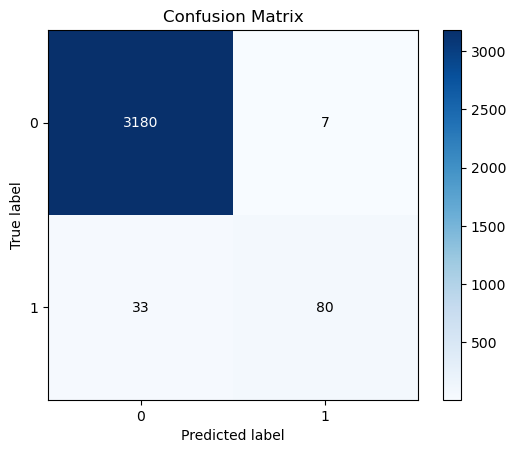

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       116
           1       0.99      1.00      0.99      3184

    accuracy                           0.99      3300
   macro avg       0.95      0.84      0.89      3300
weighted avg       0.99      0.99      0.99      3300



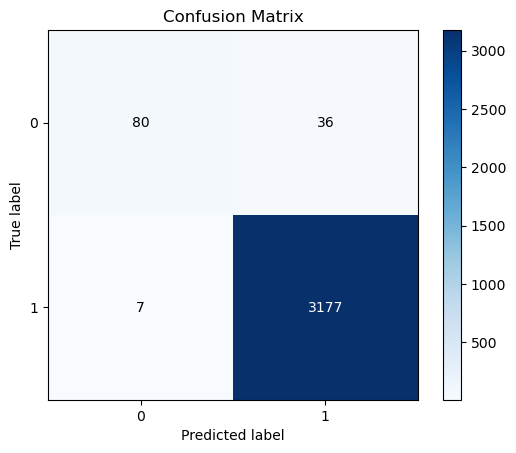

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3261
           1       0.93      0.95      0.94        39

    accuracy                           1.00      3300
   macro avg       0.96      0.97      0.97      3300
weighted avg       1.00      1.00      1.00      3300



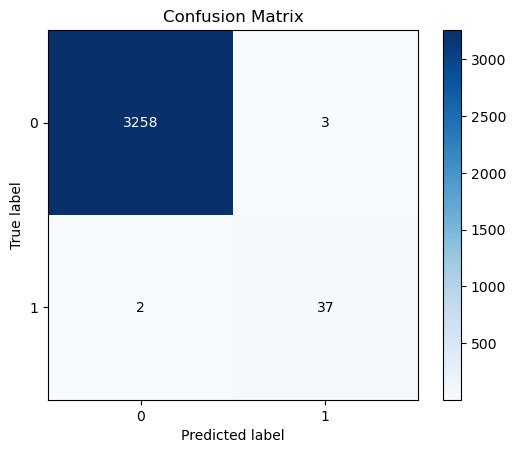

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3276
           1       0.74      0.71      0.72        24

    accuracy                           1.00      3300
   macro avg       0.87      0.85      0.86      3300
weighted avg       1.00      1.00      1.00      3300



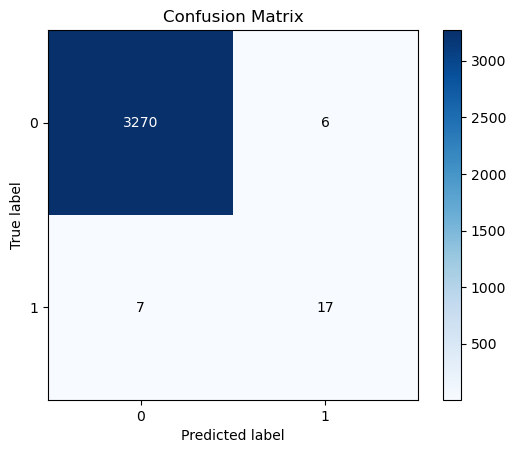

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3266
           1       0.78      0.53      0.63        34

    accuracy                           0.99      3300
   macro avg       0.89      0.76      0.81      3300
weighted avg       0.99      0.99      0.99      3300



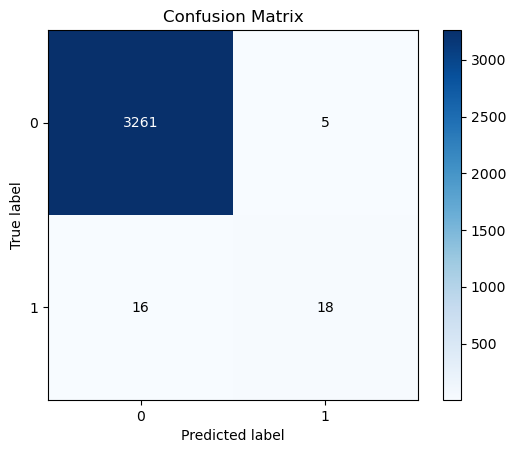

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3286
           1       0.00      0.00      0.00        14

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



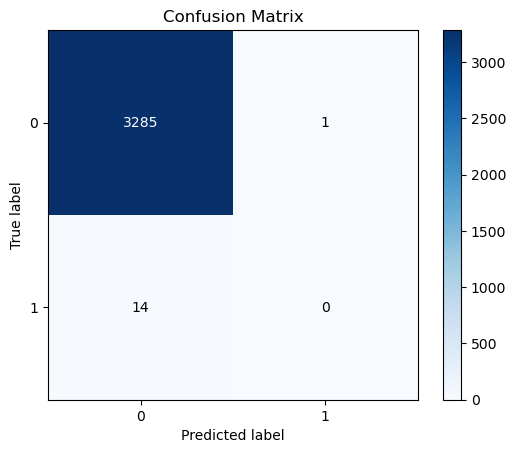

D:\material\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\material\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\material\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3295
           1       0.00      0.00      0.00         5

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       1.00      1.00      1.00      3300



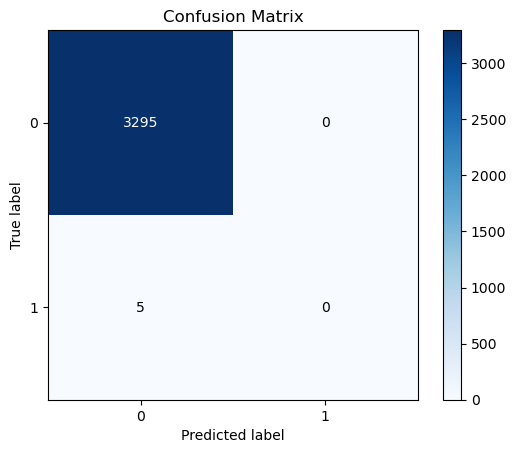

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

print(classification_report(y_test[:,0],yhat_lgb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_lgb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_lgb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_lgb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_lgb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_lgb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_lgb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_lgb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_lgb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_lgb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_lgb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_lgb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_lgb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_lgb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_lgb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_lgb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_lgb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_lgb[:,5], normalize=False)
plt.show()
print(classification_report(y_test[:,6],yhat_lgb[:,6]))
tn, fp, fn, tp = confusion_matrix(y_test[:,6],yhat_lgb[:,6]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,6],yhat_lgb[:,6], normalize=False)
plt.show()

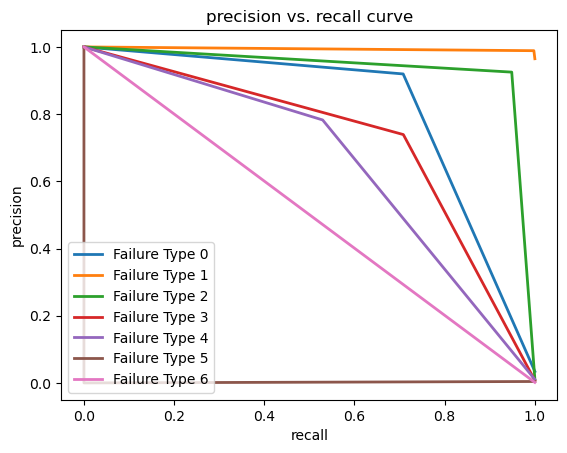

In [36]:
from sklearn.metrics import precision_recall_curve

# precision recall curve
precision = dict()
recall = dict()
n_classes = 7
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_lgb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier()
rf = MultiOutputClassifier(estimator=rand)

In [38]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9751515151515151


In [39]:
yhat_rand = rf.predict(X_test)

In [40]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_rand[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_rand[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_rand[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_rand[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_rand[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_rand[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_rand[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_rand[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_rand[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_rand[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_rand[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_rand[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_rand[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_rand[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_rand[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_rand[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_rand[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_rand[:,5])))

Accuracy Score: 0.9818
Average Precision Score: 0.5022
Matthews correlation coefficient: 0.6900
Accuracy Score: 0.9812
Average Precision Score: 0.9844
Matthews correlation coefficient: 0.6852
Accuracy Score: 0.9936
Average Precision Score: 0.4720
Matthews correlation coefficient: 0.6802
Accuracy Score: 0.9964
Average Precision Score: 0.5036
Matthews correlation coefficient: 0.7058
Accuracy Score: 0.9945
Average Precision Score: 0.5324
Matthews correlation coefficient: 0.7249
Accuracy Score: 0.9958
Average Precision Score: 0.0042
Matthews correlation coefficient: 0.0000


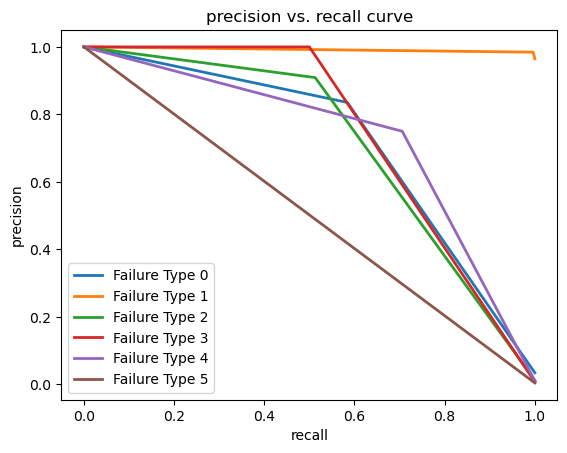

In [41]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_rand[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3187
           1       0.84      0.58      0.69       113

    accuracy                           0.98      3300
   macro avg       0.91      0.79      0.84      3300
weighted avg       0.98      0.98      0.98      3300



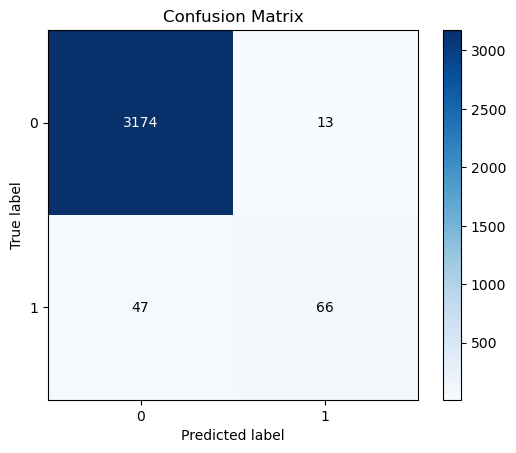

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       116
           1       0.98      1.00      0.99      3184

    accuracy                           0.98      3300
   macro avg       0.92      0.78      0.84      3300
weighted avg       0.98      0.98      0.98      3300



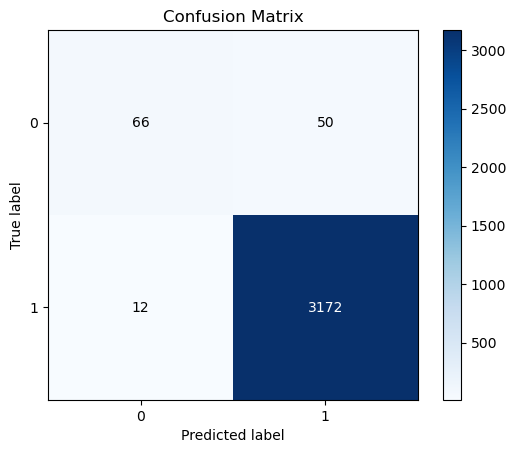

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3261
           1       0.91      0.51      0.66        39

    accuracy                           0.99      3300
   macro avg       0.95      0.76      0.83      3300
weighted avg       0.99      0.99      0.99      3300



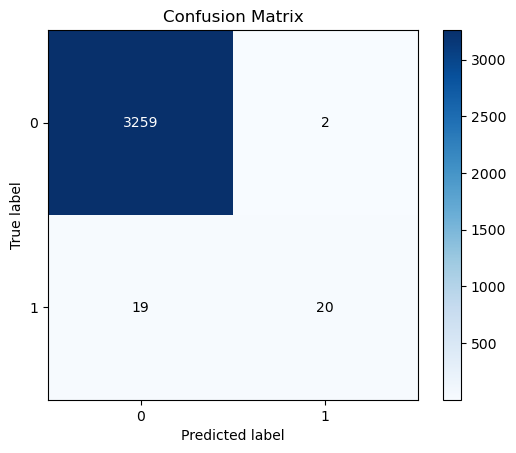

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3276
           1       1.00      0.50      0.67        24

    accuracy                           1.00      3300
   macro avg       1.00      0.75      0.83      3300
weighted avg       1.00      1.00      1.00      3300



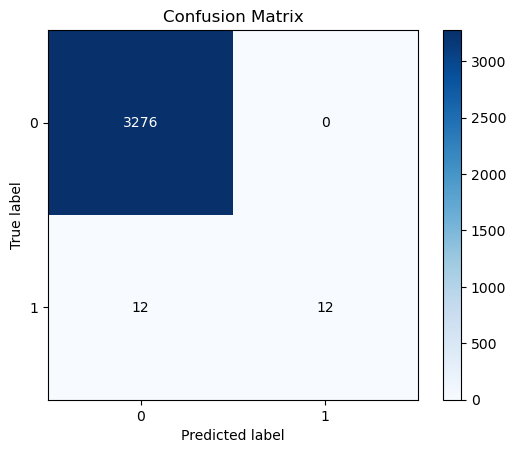

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3266
           1       0.75      0.71      0.73        34

    accuracy                           0.99      3300
   macro avg       0.87      0.85      0.86      3300
weighted avg       0.99      0.99      0.99      3300



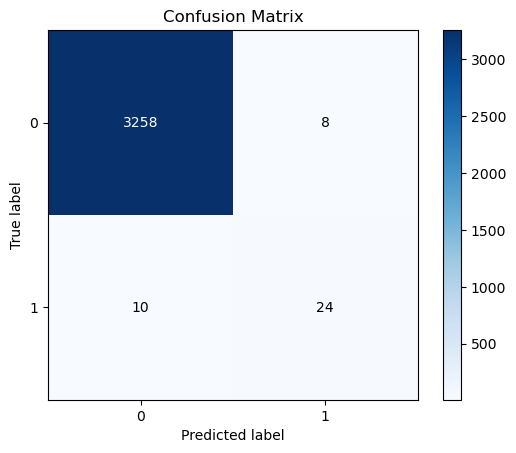

D:\material\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\material\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\material\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3286
           1       0.00      0.00      0.00        14

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



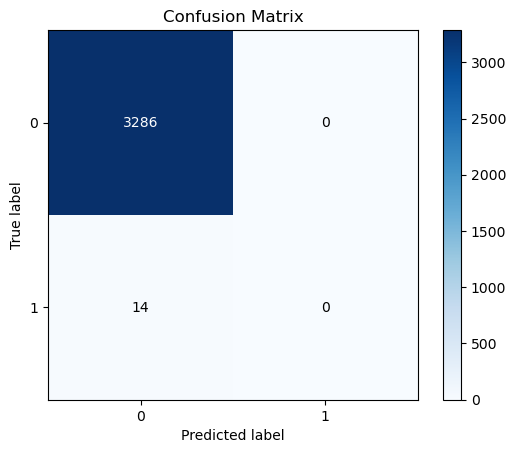

In [42]:
print(classification_report(y_test[:,0],yhat_rand[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_rand[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_rand[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_rand[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_rand[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_rand[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_rand[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_rand[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_rand[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_rand[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_rand[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_rand[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_rand[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_rand[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_rand[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_rand[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_rand[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_rand[:,5], normalize=False)
plt.show()